# Descent de Gradient L1

In [1]:
import sklearn
import matplotlib.pyplot as plt
#import seaborn as sns
import numpy as np
import random
import copy

from sklearn.datasets import fetch_mldata
from sklearn import cross_validation
from sklearn import base
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

import matplotlib.pyplot as plt

In [2]:
class GradientL1 (base.BaseEstimator):
    
    def __init__ (self, theta, eps, lamb):
        self.theta = theta
        self.eps = eps
        self.lamb = lamb
        self.nb_caract = len(theta)

    def fit (self, X, y, nb_it=1000, printevery=-1):
        l = len(X)
        XTrans = X.transpose()
        
        for it in xrange (0, nb_it):
            hypothese = np.dot(X, self.theta)
            loss = hypothese - y
            cout = (1/l) * np.sum(loss ** 2) + (self.lamb*np.linalg.norm(self.theta))
            gradient = np.dot(XTrans, (np.dot(self.theta, XTrans) - y))
            
            if it%(nb_it/100) == 0:
                thetaP = self.theta - self.eps * (np.sign(theta)*self.lamb)
            else:
                thetaP = self.theta - self.eps * gradient
            
            for j in xrange (0, len(self.theta)) :
                if theta[j]*thetaP[j] < 0 :
                    theta[j] = 0
                else :
                    theta[j] = thetaP[j]
            
            
            if printevery != -1 and (it%printevery) == 0:
                    print("Iteration %d | Cost: %f | Score: %.03f" % (it, cout, self.score(X,y)))
                    caract = self.caracteristiques()
                    print("%d features used"%(caract))
                    self.nb_caract=caract
            elif it%1000 == 0:
                caract = self.caracteristiques()
                self.nb_caract=caract
            
                
    def predict(self,x):
        predictions=[]
        for i in x:
            predictions.append(1 if np.dot(i,self.theta)>0 else -1)
        return predictions
    
    def score(self,X,y):
        res=0.0
        predictions = self.predict(X)
        for idx,i in enumerate(predictions):
            res += 1 if i==y[idx] else 0
        return res/len(X)
    
    def caracteristiques(self):
        caract = 0
        for idx in self.theta:
            if idx == 0:
                caract += 1
        return len(self.theta) - caract

## Création du dataset :

In [3]:
ds = sklearn.datasets.make_classification(n_samples=20000,
                                          n_features=50,    # 30 features
                                          n_informative=5,  # only 5 informatives ones
                                          n_redundant=0,
                                          n_repeated=3,     # and 3 duplicate
                                          n_classes=2,
                                          n_clusters_per_class=1,
                                          weights=None,
                                          flip_y=0.03,
                                          class_sep=0.8,
                                          hypercube=True,
                                          shift=0.0,
                                          scale=1.0,
                                          shuffle=True,
                                          random_state=None)
X= ds[0]
y= ds[1]


# labels: [0,1] -> [-1,1]
for idx,i in enumerate(y):
    if (i==0):
        y[idx]=-1
print X[0]        
print X[:2]
print y[:2]

[ 1.6619974   1.6205392  -0.51658314  1.99932983 -1.08897851 -0.59387486
  0.46369891  1.32358563  0.38298105  1.88776517  0.68383447 -0.26924797
 -0.70762748  0.37542279  0.33142512  0.23672878  0.84687254 -0.59006249
 -1.20835093 -0.932551   -0.34669583 -0.13800838 -0.47074708 -0.80733248
 -0.8294201  -0.25426574  0.53250422  1.78855985 -1.35892732 -0.19908546
  1.67919308 -0.5288767  -0.82879895 -0.6665436  -2.04269786 -0.04856159
  2.06344251  1.21316469  1.78855985 -0.62449759 -0.55836935 -0.77732676
  1.10605268  1.0761612   0.28306007 -1.08897851  0.49741309  0.03862831
  1.38836096  0.84687254]
[[ 1.6619974   1.6205392  -0.51658314  1.99932983 -1.08897851 -0.59387486
   0.46369891  1.32358563  0.38298105  1.88776517  0.68383447 -0.26924797
  -0.70762748  0.37542279  0.33142512  0.23672878  0.84687254 -0.59006249
  -1.20835093 -0.932551   -0.34669583 -0.13800838 -0.47074708 -0.80733248
  -0.8294201  -0.25426574  0.53250422  1.78855985 -1.35892732 -0.19908546
   1.67919308 -0.528

## Test du modèle (λ=0) :

In [15]:
theta = copy.deepcopy(X[0])
eps=0.000005

lamb=0
nbIterations = 5000
gd = GradientL1(theta,eps,lamb)
gd.fit(X,y,nbIterations,printevery=nbIterations/10)
scores = cross_validation.cross_val_score(gd, X, y, cv=5,scoring="accuracy")
print("Cross validation scores: %s, mean: %.02f"%(scores,np.mean(scores)))

Iteration 0 | Cost: 0.000000 | Score: 0.398
50 features used
Iteration 500 | Cost: 0.000000 | Score: 0.850
50 features used
Iteration 1000 | Cost: 0.000000 | Score: 0.850
50 features used
Iteration 1500 | Cost: 0.000000 | Score: 0.850
50 features used
Iteration 2000 | Cost: 0.000000 | Score: 0.850
50 features used
Iteration 2500 | Cost: 0.000000 | Score: 0.850
50 features used
Iteration 3000 | Cost: 0.000000 | Score: 0.850
50 features used
Iteration 3500 | Cost: 0.000000 | Score: 0.850
50 features used
Iteration 4000 | Cost: 0.000000 | Score: 0.850
50 features used
Iteration 4500 | Cost: 0.000000 | Score: 0.850
50 features used
Cross validation scores: [ 0.853    0.84225  0.84525  0.8495   0.861  ], mean: 0.85


## Test du modèle (λ=50) :

In [16]:
theta = copy.deepcopy(X[0])
eps=0.000005

lamb=50
nbIterations = 5000
gd = GradientL1(theta,eps,lamb)
gd.fit(X,y,nbIterations,printevery=nbIterations/10)
scores = cross_validation.cross_val_score(gd, X, y, cv=5,scoring="accuracy")
print("Cross validation scores: %s, mean: %.02f"%(scores,np.mean(scores)))

Iteration 0 | Cost: 478.219611 | Score: 0.398
50 features used
Iteration 500 | Cost: 24.228580 | Score: 0.850
47 features used
Iteration 1000 | Cost: 24.228580 | Score: 0.850
47 features used
Iteration 1500 | Cost: 24.228580 | Score: 0.850
47 features used
Iteration 2000 | Cost: 24.228580 | Score: 0.850
47 features used
Iteration 2500 | Cost: 24.228580 | Score: 0.850
47 features used
Iteration 3000 | Cost: 24.228580 | Score: 0.850
47 features used
Iteration 3500 | Cost: 24.228580 | Score: 0.850
47 features used
Iteration 4000 | Cost: 24.228580 | Score: 0.850
47 features used
Iteration 4500 | Cost: 24.228580 | Score: 0.850
47 features used
Cross validation scores: [ 0.853    0.842    0.84525  0.8495   0.861  ], mean: 0.85


In [17]:
lambdas = []
cross_sc = []
used_features = []

for lamb in np.arange(0,10000,1000):
    theta = copy.deepcopy((X[1]+X[10]))
    gd = GradientL1(theta,eps,lamb)
    nbIterations = 4000
    gd.fit(X,y,nbIterations)
    scores = cross_validation.cross_val_score(gd, X, y, cv=5,scoring="accuracy")
    print("Lamda: %s | Cross val mean: %.03f | Features: %d"%(str(lamb).ljust(5),np.mean(scores),gd.nb_caract))
    #print("Lamda: %.02f | Cross val mean: %.02f | Features: %d"%(lamb,gd.score(X,y),gd.used_features))
    cross_sc.append(np.mean(scores))
    lambdas.append(lamb)
    used_features.append(gd.nb_caract)

Lamda: 0     | Cross val mean: 0.850 | Features: 50
Lamda: 1000  | Cross val mean: 0.850 | Features: 22
Lamda: 2000  | Cross val mean: 0.850 | Features: 8
Lamda: 3000  | Cross val mean: 0.850 | Features: 6
Lamda: 4000  | Cross val mean: 0.849 | Features: 6
Lamda: 5000  | Cross val mean: 0.850 | Features: 6
Lamda: 6000  | Cross val mean: 0.850 | Features: 6
Lamda: 7000  | Cross val mean: 0.850 | Features: 6
Lamda: 8000  | Cross val mean: 0.850 | Features: 6
Lamda: 9000  | Cross val mean: 0.850 | Features: 6


## Courbe de performance :

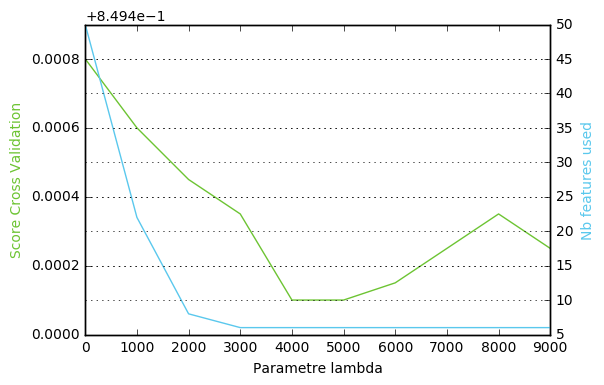

In [18]:
figure, score = plt.subplots()
features = score.twinx()


score.plot(lambdas, cross_sc, '#6DC433')
features.plot(lambdas, used_features, '#5AC8ED')

score.set_xlabel('Parametre lambda')
score.set_ylabel('Score Cross Validation', color='#6DC433')
features.set_ylabel('Nb features used', color='#5AC8ED')
score.yaxis.grid(True)
features.grid(True)
plt.show()